In [1]:
import sys
import os

# Find and print your working directory to debug
print("Current working directory:", os.getcwd())

# Manually define the full path to the inner MetaForge module
project_root = r"C:\Users\magee\MetaForge\MetaForge"

# Add it to sys.path
if project_root not in sys.path:
    sys.path.insert(0, project_root)

Current working directory: C:\Users\magee\MetaForge\notebooks


In [2]:
# from problems.jobshop import JobShopProblem

# # Sample problem definition
# jobs = [
#     [(0, 3), (1, 2), (2, 2)],
#     [(1, 2), (2, 4), (0, 1)],
#     [(2, 4), (0, 3), (1, 1)],
# ]

# # Initialize problem and solver
# problem = JobShopProblem(jobs)

In [3]:
from problems.benchmark_loader import load_job_shop_instance
from utils.compare_solvers import compare_solvers

# Load the problem instance
# problem = load_job_shop_instance("benchmarks/ft06.txt", format="orlib")
problem = load_job_shop_instance("C:/Users/magee/MetaForge/MetaForge/problems/benchmarks/ft06.txt", format="orlib")

In [4]:
from solvers.simulated_annealing import SimulatedAnnealingSolver
from solvers.genetic_algorithm import GeneticAlgorithmSolver
from solvers.tabu_search import TabuSearchSolver

from utils.plotting import plot_solver_dashboard
from utils.visualization import plot_gantt_chart
from utils.visualization import animate_gantt_evolution
from utils.plotting import plot_convergence_comparison

from IPython.display import HTML

In [5]:
sa = SimulatedAnnealingSolver(problem, initial_temp=1000, cooling_rate=0.95, max_iterations=1000)
ga = GeneticAlgorithmSolver(problem, population_size=20, generations=50, crossover_rate=0.9, mutation_rate=0.2)
ts = TabuSearchSolver(problem, max_iter=100, tabu_tenure=5, neighborhood_size=30)

In [6]:
ga_solution, ga_score, ga_history, ga_schedules = ga.run(track_history=True, track_schedule=True)
ts_solution, ts_score, ts_history, ts_schedules = ts.run(track_schedule=True)
sa_solution, sa_score, sa_history, sa_temp, sa_all_schedules = sa.run(track_schedule=True)

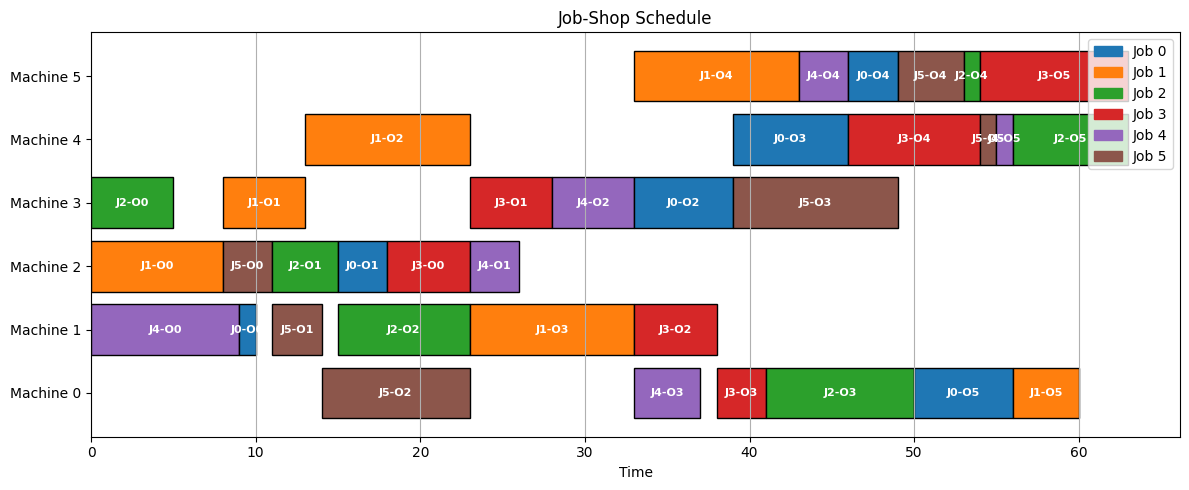

In [7]:
schedule = problem.get_schedule(ga_solution)
plot_gantt_chart(schedule, problem.num_machines, problem.num_jobs)

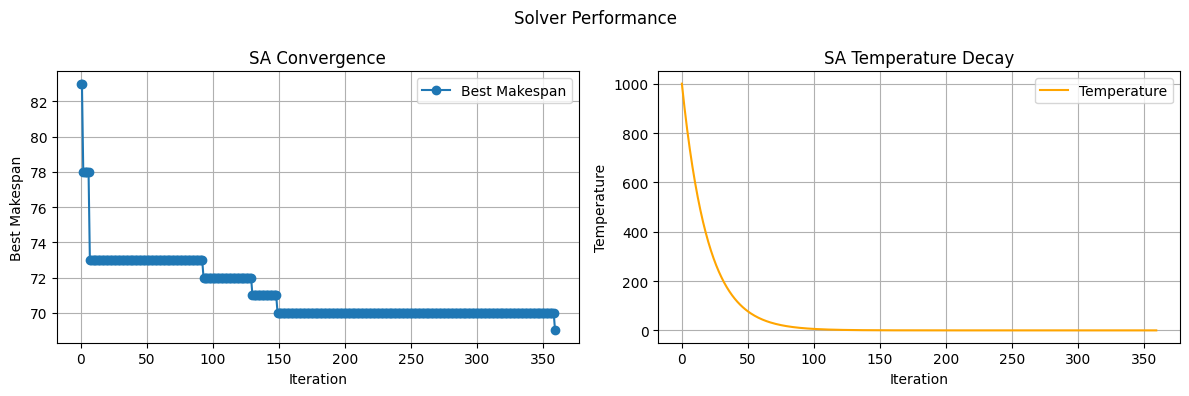

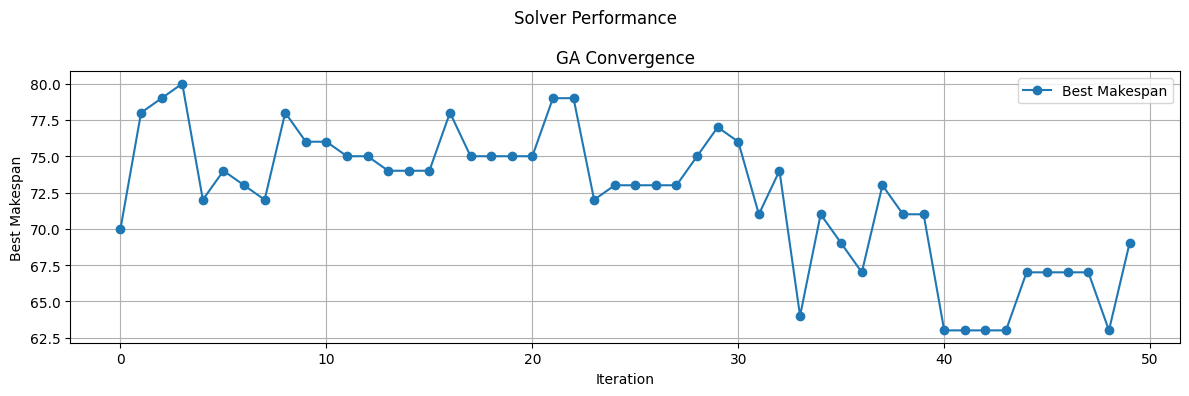

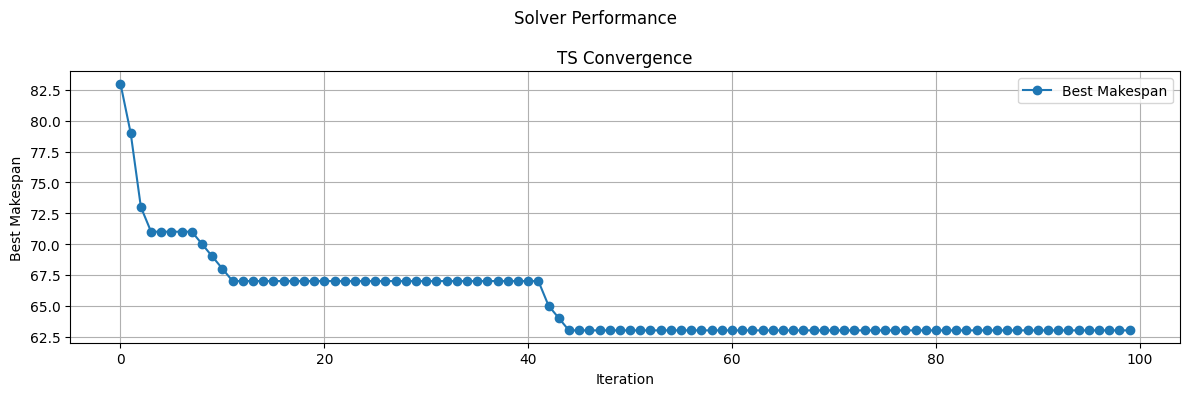

In [8]:
plot_solver_dashboard(sa_history, temperature=sa_temp, solver_name="SA")
plot_solver_dashboard(ga_history, solver_name="GA")
plot_solver_dashboard(ts_history, solver_name="TS")

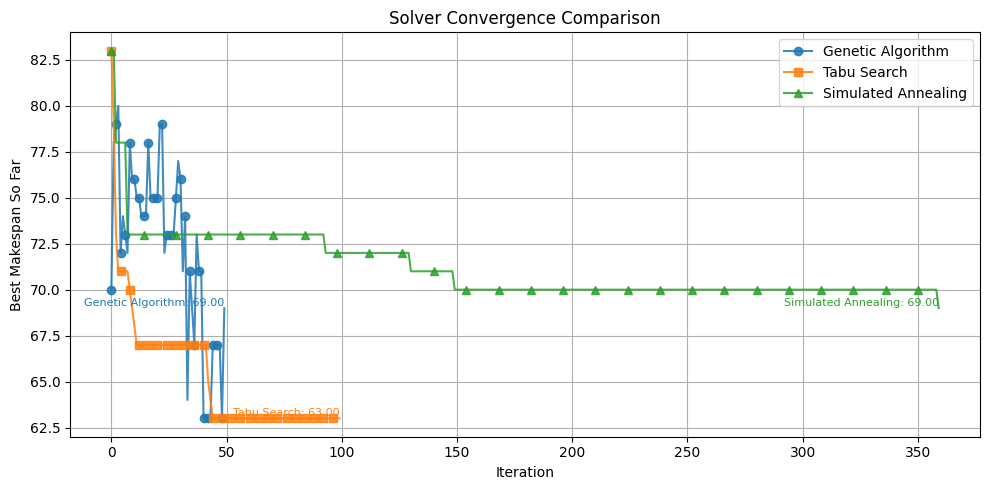

In [9]:
from utils.plotting import plot_convergence_comparison

plot_convergence_comparison({
    "Genetic Algorithm": ga_history,
    "Tabu Search": ts_history,
    "Simulated Annealing": sa_history
})


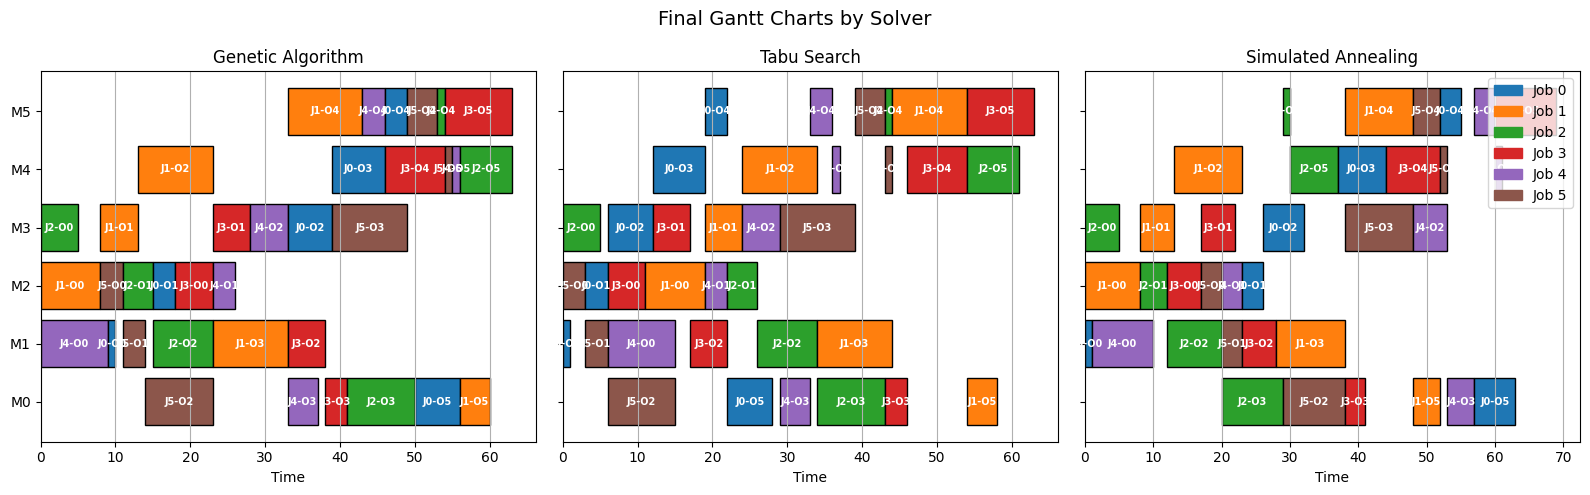

In [10]:
# Get final schedules
ga_schedule = problem.get_schedule(ga_solution)
ts_schedule = problem.get_schedule(ts_solution)
sa_schedule = problem.get_schedule(sa_solution)

from utils.visualization import plot_multiple_gantt

plot_multiple_gantt(
    schedules_dict={
        "Genetic Algorithm": ga_schedule,
        "Tabu Search": ts_schedule,
        "Simulated Annealing": sa_schedule
    },
    num_machines=problem.num_machines,
    num_jobs=problem.num_jobs
)

In [11]:
# from IPython.display import HTML
# from utils.visualization import animate_gantt_evolution

# # Create animation
# anim = animate_gantt_evolution(
#     schedule_frames=sa_all_schedules,
#     num_machines=problem.num_machines,
#     num_jobs=problem.num_jobs,
#     interval=400  # ms per frame
# )

# # Display it inline
# HTML(anim.to_jshtml())

In [12]:
# from IPython.display import HTML
# from utils.visualization import animate_gantt_evolution

# anim = animate_gantt_evolution(
#     schedule_frames=ga_schedules,
#     num_machines=problem.num_machines,
#     num_jobs=problem.num_jobs,
#     interval=400
# )

# HTML(anim.to_jshtml())

In [13]:
# from IPython.display import HTML
# from utils.visualization import animate_gantt_evolution

# anim = animate_gantt_evolution(
#     schedule_frames=ts_schedules,
#     num_machines=problem.num_machines,
#     num_jobs=problem.num_jobs,
#     interval=400
# )

# HTML(anim.to_jshtml())

In [14]:
from core.metaforge_runner import run_solver

ts_result = run_solver("ts", problem, track_schedule=True)
ga_result = run_solver("ga", problem, track_schedule=True)
sa_result = run_solver("sa", problem, track_schedule=True)

print("GA Makespan:", ga_result["makespan"])
print("TS Time:", ts_result["time"], "seconds")

GA Makespan: 69
TS Time: 0.07577824592590332 seconds


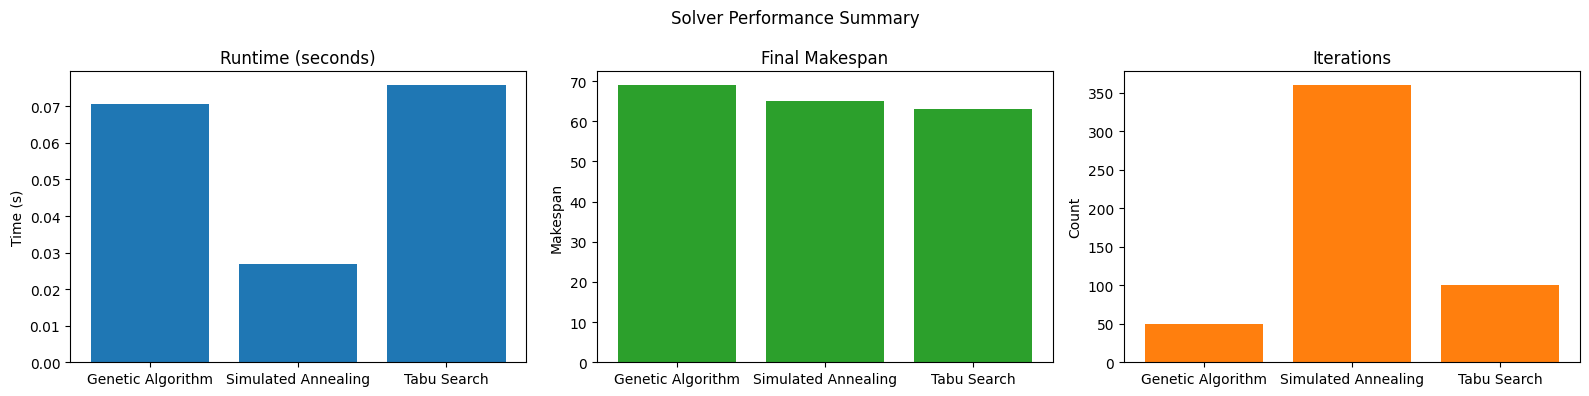

In [15]:
from utils.plotting import plot_solver_summary

results = {
    "Genetic Algorithm": ga_result,
    "Simulated Annealing": sa_result,
    "Tabu Search": ts_result
}

plot_solver_summary(results)


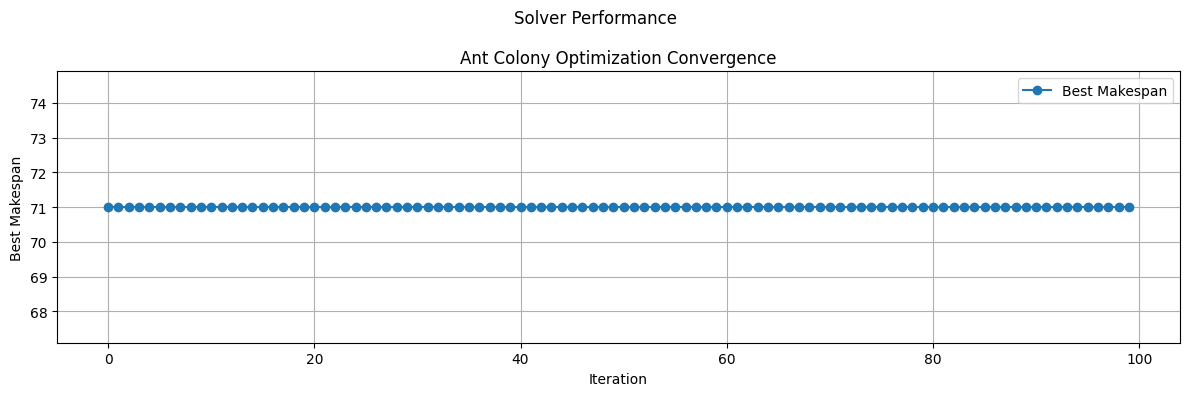

In [16]:
aco_result = run_solver("aco", problem, track_schedule=True)

# Plot convergence
plot_solver_dashboard(aco_result["history"], solver_name="Ant Colony Optimization")

# Animate
# anim = animate_gantt_evolution(
#     schedule_frames=aco_result["schedules"],
#     num_machines=problem.num_machines,
#     num_jobs=problem.num_jobs
# )
# HTML(anim.to_jshtml())

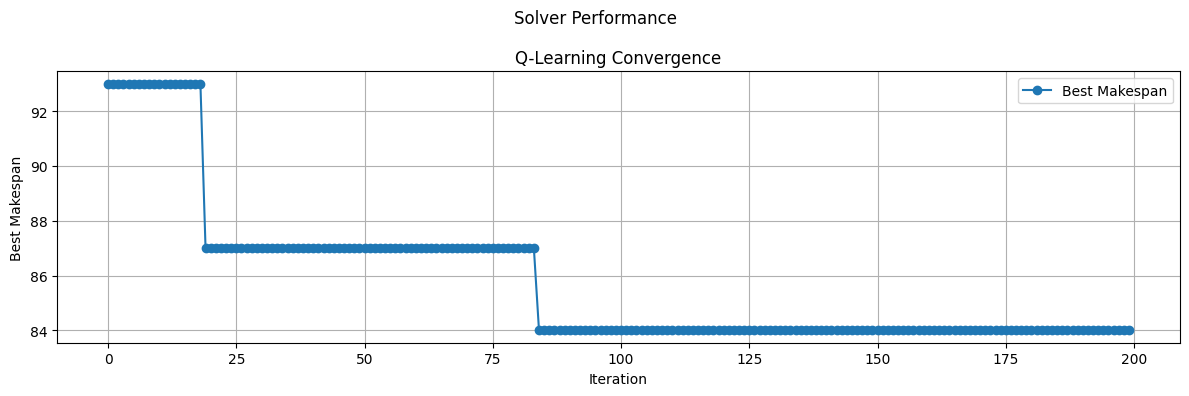

In [17]:
q_result = run_solver("q", problem, track_schedule=True)

# Plot convergence
plot_solver_dashboard(q_result["history"], solver_name="Q-Learning")

# Animate
# anim = animate_gantt_evolution(
#     schedule_frames=q_result["schedules"],
#     num_machines=problem.num_machines,
#     num_jobs=problem.num_jobs
# )
# HTML(anim.to_jshtml())

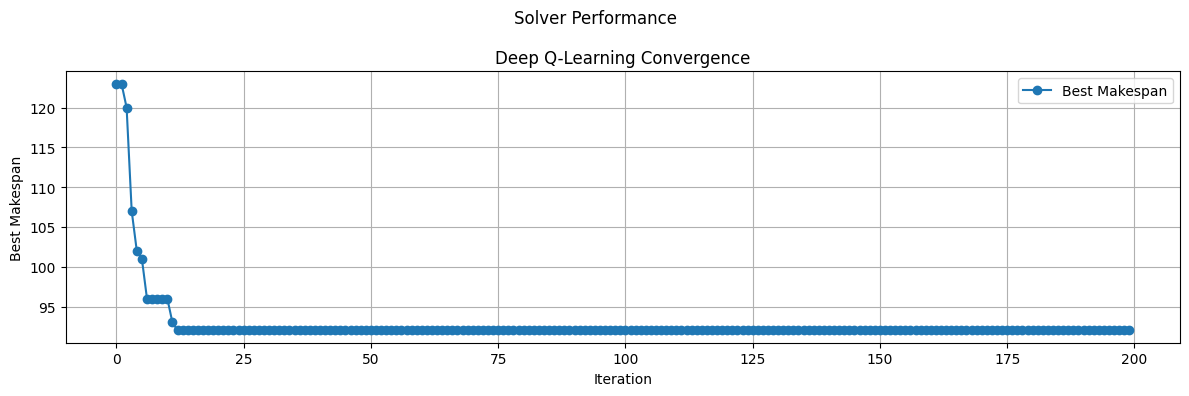

In [18]:
dqn_result = run_solver("dqn", problem, track_schedule=True)

# Plot convergence
plot_solver_dashboard(dqn_result["history"], solver_name="Deep Q-Learning")

# Animate evolution
# anim = animate_gantt_evolution(
#     schedule_frames=dqn_result["schedules"],
#     num_machines=problem.num_machines,
#     num_jobs=problem.num_jobs
# )
# HTML(anim.to_jshtml())


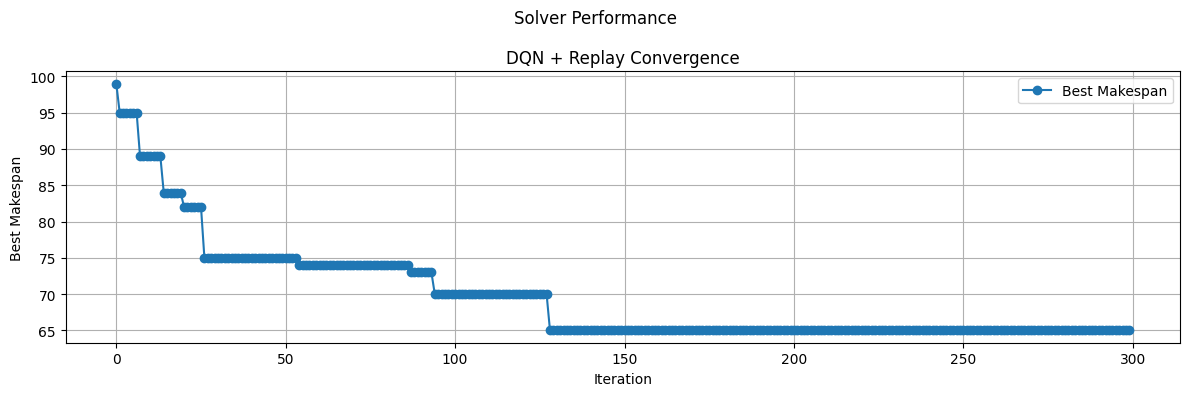

In [19]:
replay_result = run_solver("dqn-replay", problem, track_schedule=True)

plot_solver_dashboard(replay_result["history"], solver_name="DQN + Replay")

# Animate evolution
# anim = animate_gantt_evolution(
#     schedule_frames=replay_result["schedules"],
#     num_machines=problem.num_machines,
#     num_jobs=problem.num_jobs
# )
# HTML(anim.to_jshtml())

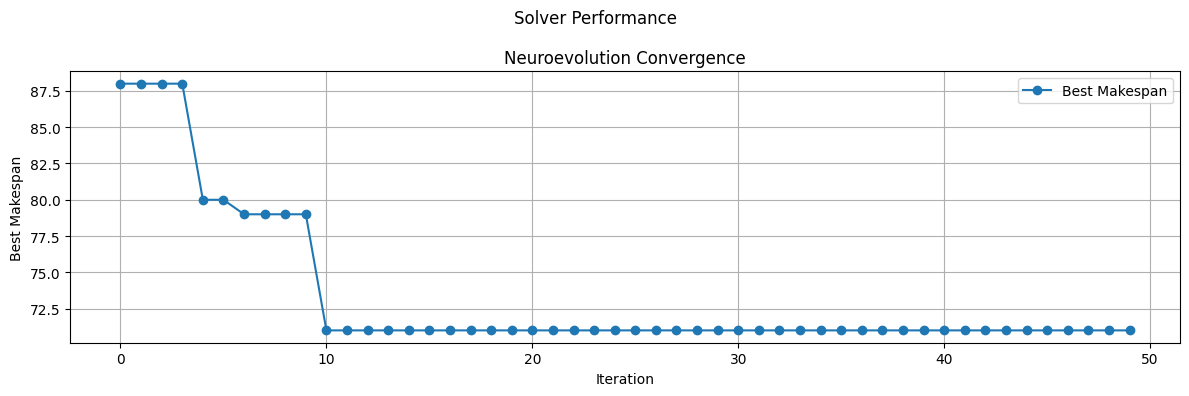

In [20]:
replay_result = run_solver("neuroevo", problem, track_schedule=True)

plot_solver_dashboard(replay_result["history"], solver_name="Neuroevolution")

# # Animate evolution
# anim = animate_gantt_evolution(
#     schedule_frames=replay_result["schedules"],
#     num_machines=problem.num_machines,
#     num_jobs=problem.num_jobs
# )
# HTML(anim.to_jshtml())

🔧 Running solver: ts...
🔧 Running solver: aco...
🔧 Running solver: dqn...
🔧 Running solver: dqn-replay...
🔧 Running solver: neuroevo...


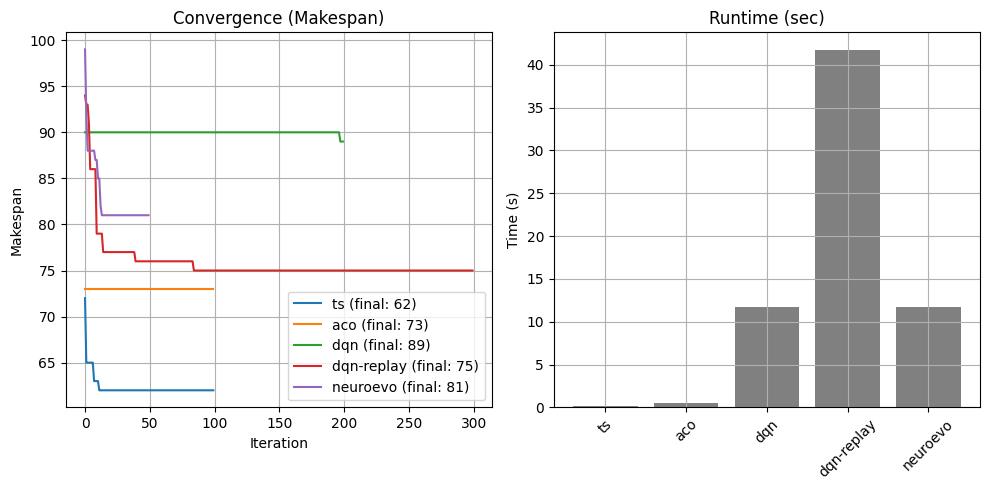

In [21]:
from utils.compare_solvers import compare_solvers

solvers = ["ts", "aco", "dqn", "dqn-replay", "neuroevo"]
results = compare_solvers(solvers, problem)

🔧 Running solver: sa...
🔧 Running solver: ts...
🔧 Running solver: ga...
🔧 Running solver: aco...
🔧 Running solver: q...
🔧 Running solver: dqn...
🔧 Running solver: dqn-replay...
🔧 Running solver: neuroevo...


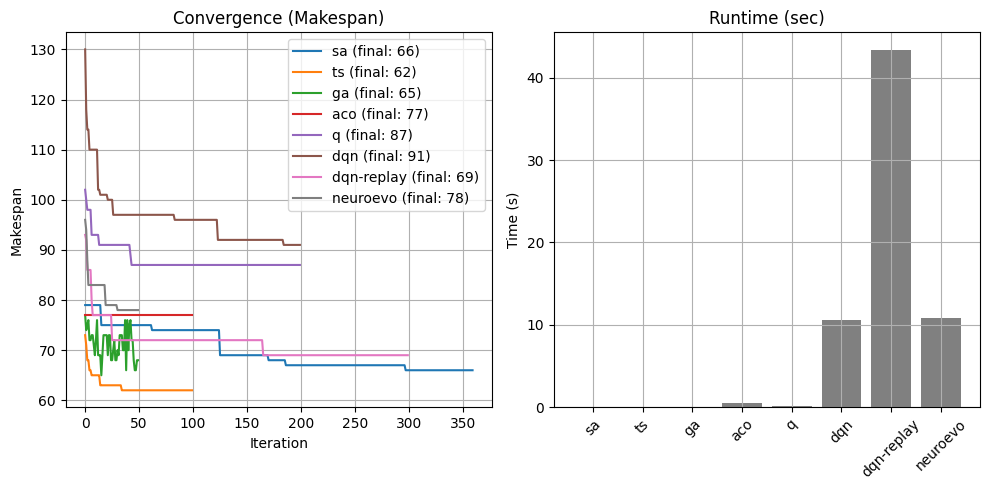

Solver: sa
  Best Makespan: 66
  Runtime (sec): 0.01

Solver: ts
  Best Makespan: 62
  Runtime (sec): 0.06

Solver: ga
  Best Makespan: 65
  Runtime (sec): 0.07

Solver: aco
  Best Makespan: 77
  Runtime (sec): 0.47

Solver: q
  Best Makespan: 87
  Runtime (sec): 0.19

Solver: dqn
  Best Makespan: 91
  Runtime (sec): 10.64

Solver: dqn-replay
  Best Makespan: 69
  Runtime (sec): 43.33

Solver: neuroevo
  Best Makespan: 78
  Runtime (sec): 10.81



In [26]:
# Define the solvers you want to compare
solvers = ["sa", "ts", "ga", "aco", "q", "dqn", "dqn-replay", "neuroevo"]

# Run comparison and plot results
results = compare_solvers(solvers, problem, track_schedule=True, plot=True)

# Print summary
for name, res in results.items():
    print(f"Solver: {name}")
    print(f"  Best Makespan: {res['best_score']}")
    print(f"  Runtime (sec): {res['runtime_sec']}")
    print()